In [57]:
# Imports 
import numpy as np
import random
import math 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from math import factorial as fac
from numpy import sin, cos, sinh, cosh,arcsin,arccos, pi, exp,abs, matmul 
from matplotlib import cm
%matplotlib notebook

def Choose(n,k): 
    return  fac(n)/ fac(k) / fac( n - k )

class nBezier(object):
    def __init__(self, points):
        self.points = np.array(points).astype(np.float32)

    def at(self, u,v,w):
        pt = 0 
        n=  self.points.shape[0]
        m = self.points.shape[1]
        p = self.points.shape[2]
        for k in range(n):
            for l in range(m):
                for o in range(p):
                    pt += Choose(n-1,k)*(1-u)**(n-1-k)*u**k*Choose(m-1,l)*(1-v)**(m-1-l)*v**l*Choose(p-1,o)*(1-w)**(p-1-o)*w**o*self.points[k,l,o]
        return pt


def fourDtothreeD(angle,angle1, points): 
    proj_points = [] 
    for i in range(points.shape[0]):
        rotationXY = np.array([[cos(angle), -sin(angle), 0, 0],[sin(angle), cos(angle), 0, 0],[0, 0, 1, 0],[0, 0, 0, 1]]) 
        rotationZW = np.array([[1, 0, 0, 0],[0, 1, 0, 0],[0, 0, cos(angle1), -sin(angle1)],[0, 0, sin(angle1), cos(angle1)]]) 
        rotated1 = matmul(rotationXY,points[i,:])
        rotated2 = matmul(rotationZW, rotated1)
        distance = 2;
        w = 1 / (distance - rotated2[3]);
        projection = np.array([[w, 0, 0, 0],[0, w, 0, 0],[0, 0, w, 0]])
        projected = matmul(projection, rotated2)
        proj_points.append(projected)
    return np.array(proj_points) 


# Create uniform points 
'''
n = 5
array2 = [[x, y, z] for x in range(n) for y in range(n) for z in range(n)]
array2 = np.array(array2)
a3= np.zeros((n**3,1))
a3 = np.reshape(a3,(a3.shape[0],1))
array2 = np.hstack((array2,a3))
array2 = np.reshape(array2,(n,n,n,4))
''' 

# Create random points 

n = 5
array2 = [[x, y, z] for x in range(n) for y in range(n) for z in range(n)]
array2 = np.array(array2)

num = 25 
a3= np.zeros((n**3,1))
newArray = np.random.randint(0, n**3-1, size=(num, 1))
a3[newArray,:] = np.random.randint(-1, 3, size=(num, 1,1))*1
a3 = np.reshape(a3,(a3.shape[0],1))
array1 = np.hstack((array2,a3))

array2 = np.reshape(array1,(n,n,n,4))

Curve  = nBezier(array2)

size = 10
u = np.linspace(0,1,size) 
v = np.linspace(0,1,size) 
w = np.linspace(0,1,size) 


grid_of_pts = []
for  item1 in u:
    pts1 = [] 
    for item2 in v:
        pts2 = [] 
        for item3 in w:
            pts2.append(Curve.at(item1,item2, item3))
        pts1.append(pts2)
    grid_of_pts.append(pts1)

grid_of_pts1 = np.array(grid_of_pts)
grid_of_pts2 = np.reshape(grid_of_pts1,(size**3,4))

<ipython-input-57-d9541fea3e2a>:39: RuntimeWarning: divide by zero encountered in double_scalars
  w = 1 / (distance - rotated2[3]);
<ipython-input-57-d9541fea3e2a>:41: RuntimeWarning: invalid value encountered in matmul
  projected = matmul(projection, rotated2)


<IPython.core.display.Javascript object>


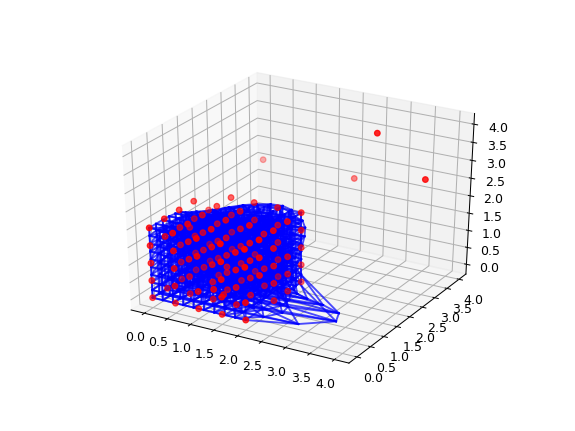

' \n'

In [71]:
# Projection
angle= 0*pi/4; angle1= 0*pi/3;

grid_of_pts1 = fourDtothreeD(angle,angle1, grid_of_pts2)
inipts = fourDtothreeD(angle,angle1, array1)
#pp = Pointset(grid_of_pts)

grid_of_pts = np.reshape(grid_of_pts1,(size,size,size,3))
inipts = np.reshape(inipts,(n,n,n,3))
val = 0.7

edges = []
    

for i in range(size):
    for j in range(size): 
        for k in range(size): 
            edges.append(grid_of_pts[i,j,k,:]); edges.append(grid_of_pts[(i+1)%size,j,k,:])
            edges.append(grid_of_pts[i,j,k,:]); edges.append(grid_of_pts[i,(j+1)%size,k,:])
            edges.append(grid_of_pts[i,j,k,:]); edges.append(grid_of_pts[i,j,(k+1)%size,:])

edges = np.array(edges)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
for i in range(0, len(edges)-1, 2):
    ax.plot(edges[i:i+2,0], edges[i:i+2,1],edges[i:i+2,2],color='b', alpha = 0.7)
'''

ax.plot_surface(grid_of_pts[0,:,:,0], grid_of_pts[0,:,:,1], grid_of_pts[0,:,:,2],color='blue', alpha=val)
 
ax.plot_surface(grid_of_pts[-1,:,:,0], grid_of_pts[-1,:,:,1], grid_of_pts[-1,:,:,2],color='blue', alpha=val)


ax.plot_surface(grid_of_pts[:,0,:,0], grid_of_pts[:,0,:,1], grid_of_pts[:,0,:,2],color='blue', alpha=val)
ax.plot_surface(grid_of_pts[:,-1,:,0], grid_of_pts[:,-1,:,1], grid_of_pts[:,-1,:,2],color='blue', alpha=val)

ax.plot_surface(grid_of_pts[:,:,0,0], grid_of_pts[:,:,0,1], grid_of_pts[:,:,0,2],color='blue', alpha=val)
ax.plot_surface(grid_of_pts[:,:,-1,0], grid_of_pts[:,:,-1,1], grid_of_pts[:,:,-1,2],color='blue', alpha=val)
'''
ax.scatter3D(inipts[:,:,:,0], inipts[:,:,:,1], inipts[:,:,:,2], c='r')

#plt.savefig('Bzvolume4wire.png')
plt.show()
''' 
'''

<IPython.core.display.Javascript object>


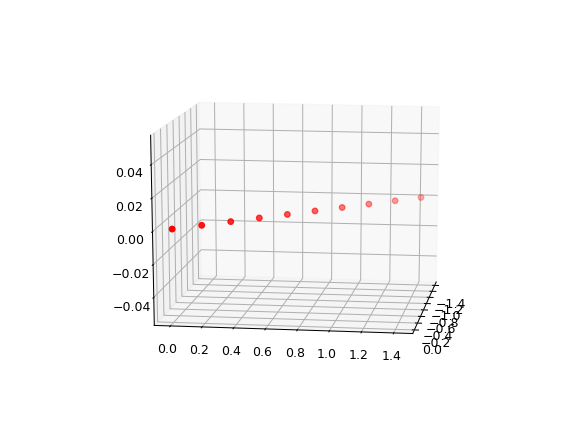

In [20]:
fig = plt.figure()
ax = plt.axes(projection='3d')



#plt.savefig('Bzvolume1.png')
plt.show()


In [ ]:

fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.scatter3D(grid_of_pts[:,:,:,0], grid_of_pts[:,:,:,1], grid_of_pts[:,:,:,2], c='r')
ax.plot_surface(inipts[0,0,:,0], inipts[0,0,:,1], inipts[0,0,:,2],color='blue', alpha=val)

'''
ax.plot_surface(grid_of_pts[0,:,:,0], grid_of_pts[0,:,:,1], grid_of_pts[0,:,:,2],color='blue', alpha=val)
 
ax.plot_surface(grid_of_pts[-1,:,:,0], grid_of_pts[-1,:,:,1], grid_of_pts[-1,:,:,2],color='blue', alpha=val)


ax.plot_surface(grid_of_pts[:,0,:,0], grid_of_pts[:,0,:,1], grid_of_pts[:,0,:,2],color='blue', alpha=val)
ax.plot_surface(grid_of_pts[:,-1,:,0], grid_of_pts[:,-1,:,1], grid_of_pts[:,-1,:,2],color='blue', alpha=val)

ax.plot_surface(grid_of_pts[:,:,0,0], grid_of_pts[:,:,0,1], grid_of_pts[:,:,0,2],color='blue', alpha=val)
ax.plot_surface(grid_of_pts[:,:,-1,0], grid_of_pts[:,:,-1,1], grid_of_pts[:,:,-1,2],color='blue', alpha=val)
 
'''

In [22]:
print(inipts)

[[[[  0.           0.           0.        ]
   [  0.           0.           0.44092699]
   [  0.           0.           3.73205081]
   [  0.           0.          -2.50804157]
   [  0.           0.          -1.3660254 ]]

  [[ -0.35355339   0.35355339   0.        ]
   [ -0.62356492   0.62356492   0.44092699]
   [ -2.63895843   2.63895843   3.73205081]
   [  1.18230213  -1.18230213  -2.50804157]
   [  0.48296291  -0.48296291  -1.3660254 ]]

  [[ -0.70710678   0.70710678   0.        ]
   [ -1.24712984   1.24712984   0.44092699]
   [ -5.27791687   5.27791687   3.73205081]
   [  2.36460427  -2.36460427  -2.50804157]
   [  0.96592583  -0.96592583  -1.3660254 ]]

  [[ -1.06066017   1.06066017   0.        ]
   [ -1.87069477   1.87069477   0.44092699]
   [ -7.9168753    7.9168753    3.73205081]
   [  3.5469064   -3.5469064   -2.50804157]
   [  1.44888874  -1.44888874  -1.3660254 ]]

  [[ -1.41421356   1.41421356   0.        ]
   [ -2.49425969   2.49425969   0.44092699]
   [-10.55583374  10.555